In [66]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from config import api_key

state_codes = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']



In [67]:
#THIS SECTION OF CODE IS FOR TROUBLESHOOTING PLEASE IGNORE
#test_state='AZ'

#test_url = f'http://api.eia.gov/series/?api_key={api_key}&series_id=ELEC.PRICE.{test_state}-ALL.M'

#test_response = requests.get(test_url).json()

In [68]:
#test_response_data = test_response['series'][0]['data']
#test_response_data[0][0][0:4]
#test_response_data[0][0][4:6]


In [69]:
#year_data = []
#price_data = []

#for x in range(251):
#    year_data.append(test_response_data[x][0])
#    price_data.append(test_response_data[x][1])

#test_df = pd.df({
#    'Year':year_data,
#    'Date':price_data
#})

#test_df = test_df.set_index(['Year'])

#test_df

In [70]:
df = pd.DataFrame({})

for state in state_codes:
    url = f'http://api.eia.gov/series/?api_key={api_key}&series_id=ELEC.PRICE.{state}-ALL.M'

    response = requests.get(url).json()
    
    response_data = response['series'][0]['data']

    date_data = []
    price_data = []

    for x in range(251):
        date_data.append(response_data[x][0])
        price_data.append(response_data[x][1])
        
    df[f'{state}'] = price_data
    
df['Date (YYYY/MM)'] = date_data

In [71]:
df.sort_values('Date (YYYY/MM)',ascending=True,inplace=True)

sorted_df = df.set_index('Date (YYYY/MM)')

sorted_df.sort_index(ascending=True, inplace=True)

sorted_df
df.head()

,AL,AZ,AR,CA,CO,CT,DE,FL,GA,ID,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,Date (YYYY/MM)
250,5.54,6.35,5.69,8.71,5.55,9.76,6.11,7.43,5.90,4.43,...,5.59,6.90,4.67,10.95,5.86,4.79,4.98,5.90,4.31,200101
249,5.31,6.48,5.60,9.63,5.79,9.06,5.38,7.48,6.20,4.50,...,5.51,6.91,5.26,11.12,6.03,5.11,4.99,5.98,4.36,200102
248,5.87,6.57,5.73,9.89,5.66,9.38,6.31,7.51,6.10,4.39,...,5.48,7.02,4.92,10.84,6.06,5.37,5.15,5.93,4.34,200103
247,5.72,6.87,6.04,9.88,5.91,9.61,6.31,7.87,6.19,4.38,...,5.51,7.04,5.39,10.42,6.05,5.40,5.00,6.02,4.26,200104
246,5.60,7.86,6.16,9.82,6.20,9.57,6.74,7.87,6.23,5.12,...,5.55,7.34,5.42,10.56,6.17,5.22,5.04,5.98,4.40,200105


In [79]:
north = ['CT','ME','MA','MO','NE','NH','NJ','NY','PA','RI','VT',]

west = ['AZ','CO','CA','ID','MT','NM','NV','OR','UT','WA','WY']

mid = ['IL','IN','IA','KS','MI','MN','ND','OH','SD','WI']

south = ['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']

In [15]:
#north.append('Date (YYYY/MM)')
#west.append('Date (YYYY/MM)')
#mid.append('Date (YYYY/MM)')
#south.append('Date (YYYY/MM)')

north_df = sorted_df[north]
south_df = sorted_df[south]
mid_df = sorted_df[mid]
west_df = sorted_df[west]

north_df.head()


,CT,ME,MA,MO,NE,NH,NJ,NY,PA,RI,VT
Date (YYYY/MM),,,,,,,,,,,
200101,9.76,11.15,10.90,5.26,4.77,11.77,9.05,11.53,7.68,11.27,10.95
200102,9.06,11.05,10.93,5.35,4.95,11.31,8.77,11.17,7.46,11.34,11.12
200103,9.38,10.78,11.15,5.47,5.08,11.53,8.97,11.01,7.75,11.71,10.84
200104,9.61,9.41,11.52,5.43,4.97,11.75,9.18,10.70,7.87,12.69,10.42
200105,9.57,9.21,11.45,6.22,5.21,10.39,9.22,10.97,8.00,11.72,10.56


Text(0, 0.5, 'Average Retail Price of Electricity \n (cents per kilowatthour)')

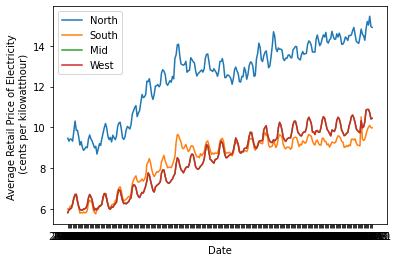

In [17]:
north_trend = north_df.mean(1)
south_trend = south_df.mean(1)
mid_trend = mid_df.mean(1)
west_trend = mid_df.mean(1)

plt.plot(df['Date (YYYY/MM)'],north_trend,label='North')
plt.plot(df['Date (YYYY/MM)'],south_trend,label='South')
plt.plot(df['Date (YYYY/MM)'],mid_trend,label='Mid')
plt.plot(df['Date (YYYY/MM)'],west_trend,label='West')
plt.legend()
#plt.grid()

plt.xlabel('Date')
plt.ylabel('Average Retail Price of Electricity \n (cents per kilowatthour)')



In [18]:
#north_df.head()
df.to_csv("Price Output/output.csv", index=False, header=True)
north_df.to_csv("Price Output/north.csv", index=False, header=True)
south_df.to_csv("Price Output/south.csv", index=False, header=True)
mid_df.to_csv("Price Output/mid.csv", index=False, header=True)
west_df.to_csv("Price Output/west.csv", index=False, header=True)